### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv('Data.csv');
item = pd.read_csv('item.csv');
user = pd.read_csv('user.csv');

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [28]:
data.shape

(100000, 4)

In [3]:
data.info

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [4]:
data.describe

<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [35]:
null_columns=data.columns[data.isnull().any()]
print(data[data.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [29]:
item.shape

(1681, 22)

In [5]:
item.info

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childre

In [6]:
item.describe

<bound method NDFrame.describe of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Child

In [36]:
null_columns=item.columns[item.isnull().any()]
print(item[item.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [32]:
user.shape

(943, 5)

In [7]:
user.info

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [8]:
user.describe

<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [37]:
null_columns=user.columns[user.isnull().any()]
print(user[user.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [38]:
total_sum = item.drop(['movie id'], axis=1).sum(axis=0, numeric_only=True).sort_values()
print (total_sum)

unknown          1
Fantasy         22
Film-Noir       24
Western         27
Animation       42
Documentary     50
Musical         56
Mystery         61
War             71
Horror          92
Sci-Fi         101
Crime          109
Childrens      122
Adventure      135
Romance        247
Action         251
Thriller       251
Comedy         505
Drama          725
dtype: int64


#### 5. Find the movies that have more than one genre - 5 marks

In [10]:
total_sum = item.drop(['movie id'], axis=1).sum(axis=1).sort_values() > 1
multiple_genre = item[total_sum]
pd.set_option('display.max_rows', None)
print (multiple_genre['movie title'])

0                                              Toy Story 
1                                              GoldenEye 
3                                             Get Shorty 
4                                                Copycat 
6                                         Twelve Monkeys 
7                                                   Babe 
9                                            Richard III 
10                                         Seven (Se7en) 
11                                   Usual Suspects, The 
13                                           Postino, Il 
15                           French Twist (Gazon maudit) 
16                                   From Dusk Till Dawn 
19                                    Angels and Insects 
20                                Muppet Treasure Island 
21                                            Braveheart 
22                                           Taxi Driver 
23                                   Rumble in the Bronx 
27            

C:\Users\yoges\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [11]:
item[item.unknown != 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

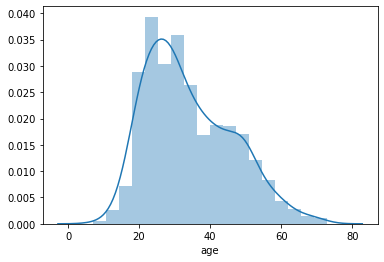

In [41]:
sns.distplot(user.age)

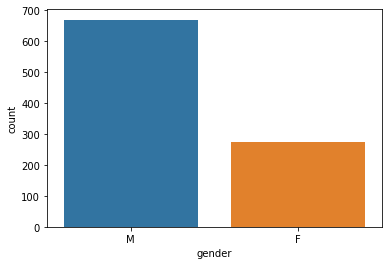

In [42]:
sns.countplot(user.gender)

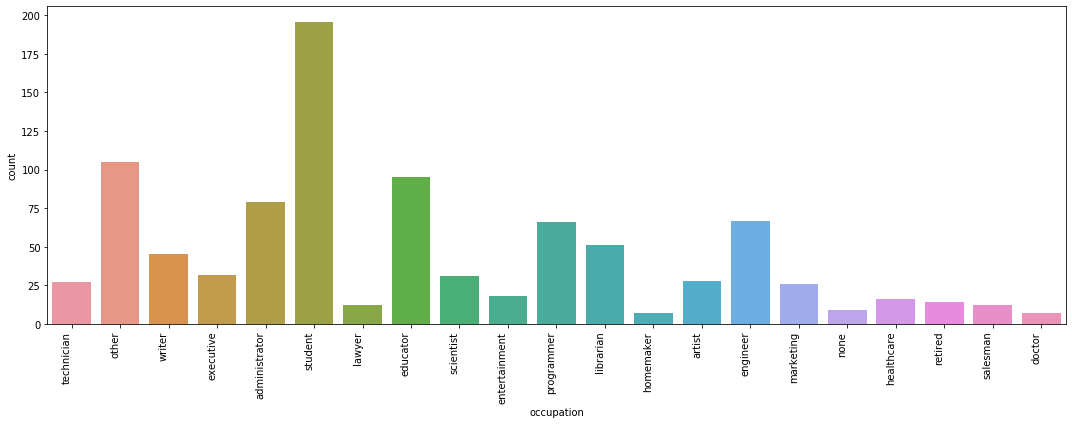

In [43]:
plt.figure(figsize=(15,6))
ax = sns.countplot(user.occupation)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

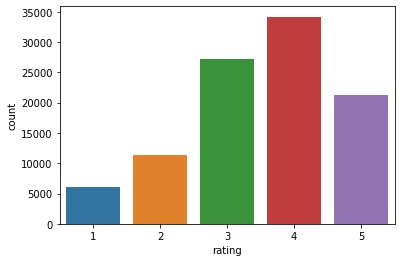

In [44]:
sns.countplot(data.rating)

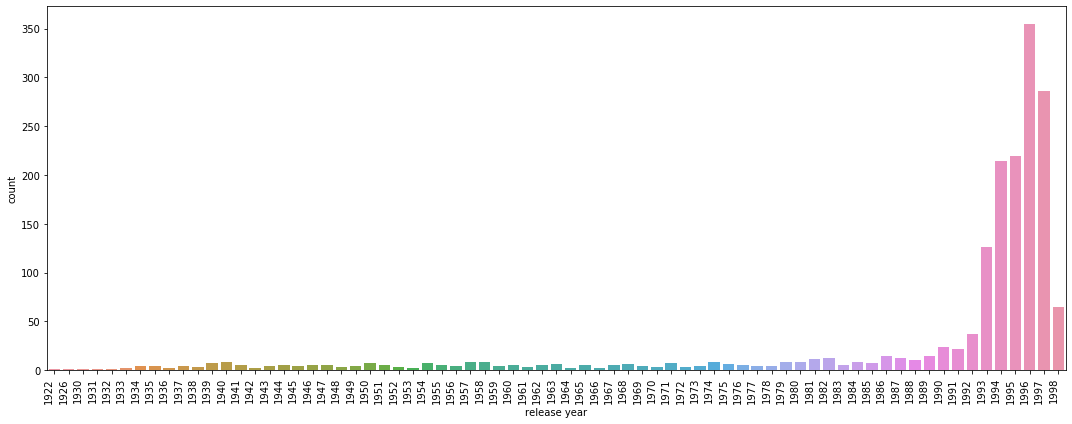

In [45]:
def label_year (row):
   return row["release date"].split('-')[2]

item['release year'] = item.apply (lambda row: label_year(row), axis=1)

plt.figure(figsize=(15,6))
ax = sns.countplot(item['release year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

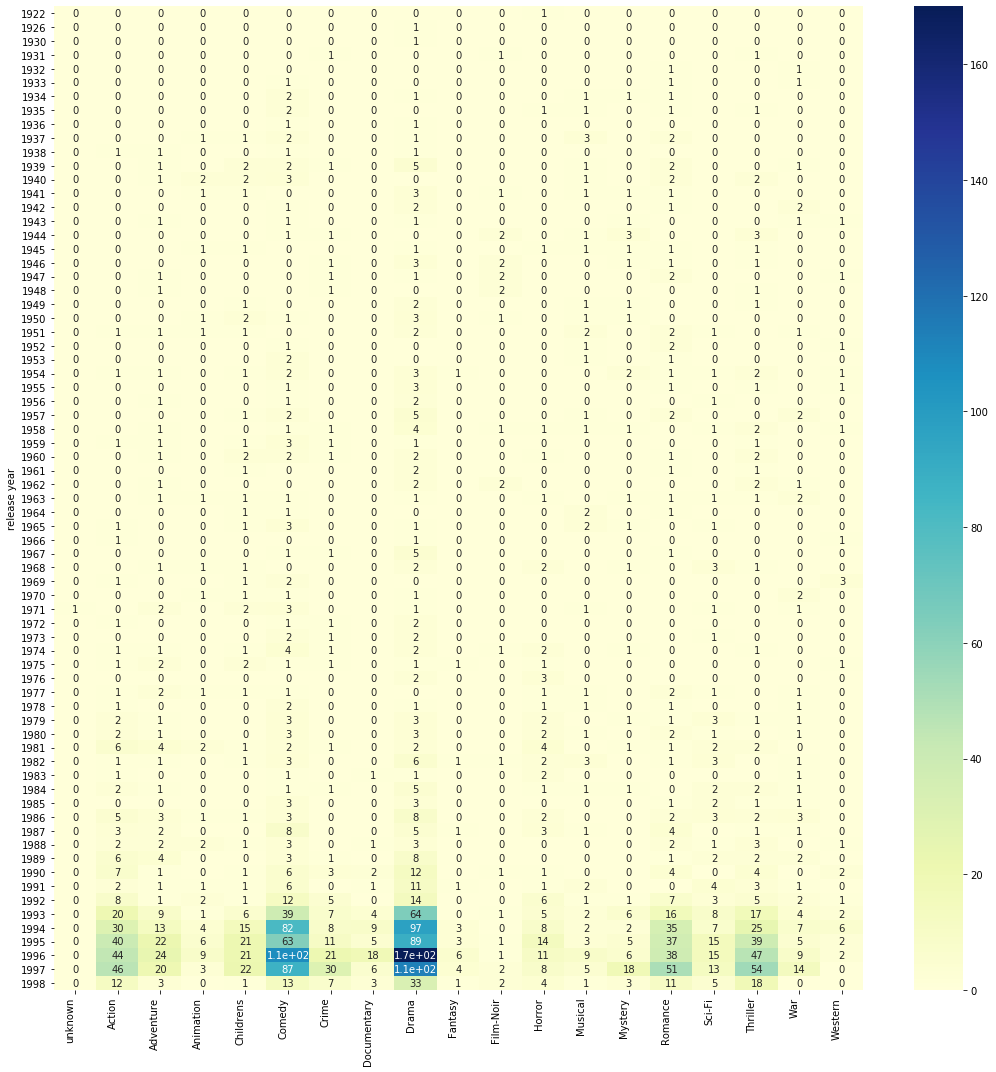

In [46]:
def label_year (row):
   return row["release date"].split('-')[2]

item['release year'] = item.apply (lambda row: label_year(row), axis=1)
df = item.drop(['movie id'], axis=1).groupby(by=['release year']).sum()

plt.figure(figsize=(15,15))
ax = sns.heatmap(df, annot=True, cmap="YlGnBu")
#ax = sns.pairplot(df, corner=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [47]:
df = data.groupby(by=['movie id']).count()
movie_ids = pd.DataFrame(df[df.rating > 100].index.tolist(), columns = ['movie id'])
df1 = data.set_index('movie id').join(movie_ids.set_index('movie id'), how='inner')
df2 = df1['rating']
df3 = df2.groupby(by=['movie id']).mean()
#print(df3)
df4 = item.set_index('movie id').join(df3, how='inner')
df4 = df4[['movie title','rating']].sort_values(by='rating',ascending=False).head(25)
print(df4)

                                                movie title    rating
movie id                                                             
408                                         Close Shave, A   4.491071
318                                       Schindler's List   4.466443
169                                    Wrong Trousers, The   4.466102
483                                             Casablanca   4.456790
64                               Shawshank Redemption, The   4.445230
603                                            Rear Window   4.387560
12                                     Usual Suspects, The   4.385768
50                                               Star Wars   4.358491
178                                           12 Angry Men   4.344000
134                                           Citizen Kane   4.292929
427                                  To Kill a Mockingbird   4.292237
357                        One Flew Over the Cuckoo's Nest   4.291667
98                  

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [18]:
# Drama viewership by gender
df = item[item['Drama'] == 1]
df1 = df[['movie id', 'movie title']]
df2 = df1.set_index('movie id').join(data.set_index('movie id'), how='inner')
df3 = df2.set_index('user id').join(user.set_index('user id'), how='inner')
df4 = df3[['gender', 'rating']]
df5 = df4.rename(columns = {'rating': 'Count'}, inplace = False)
df5.groupby(by='gender').count().sort_values(by='Count',ascending=False)

,Count
gender,
M,28887
F,11008


In [19]:
# Sci-Fi viewership by gender
df = item[item['Sci-Fi'] == 1]
df1 = df[['movie id', 'movie title']]
df2 = df1.set_index('movie id').join(data.set_index('movie id'), how='inner')
df3 = df2.set_index('user id').join(user.set_index('user id'), how='inner')
df4 = df3[['gender', 'rating']]
df5 = df4.rename(columns = {'rating': 'Count'}, inplace = False)
df5.groupby(by='gender').count().sort_values(by='Count',ascending=False)

,Count
gender,
M,10101
F,2629


In [20]:
# Romance viewership by gender
df = item[item['Romance'] == 1]
df1 = df[['movie id', 'movie title']]
df2 = df1.set_index('movie id').join(data.set_index('movie id'), how='inner')
df3 = df2.set_index('user id').join(user.set_index('user id'), how='inner')
df4 = df3[['gender', 'rating']]
df5 = df4.rename(columns = {'rating': 'Count'}, inplace = False)
df5.groupby(by='gender').count().sort_values(by='Count',ascending=False)

,Count
gender,
M,13603
F,5858


In [51]:
# CONCLUSIONS:
# Men watch more drama than women - TRUE
# Women watch more Sci-Fi than men - FALSE
# Men watch more Romance than women - TRUE